In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold,cross_val_score,train_test_split,RandomizedSearchCV


In [170]:
train=pd.read_csv("train_LZdllcl.csv")
test=pd.read_csv("test_2umaH9m.csv")

In [171]:
train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [172]:
test.head(10)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [173]:
train.shape,test.shape


((54808, 14), (23490, 13))

In [174]:
train.columns.tolist()


['employee_id',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [175]:
test.columns.tolist()

['employee_id',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']

In [176]:
train.shape,test.shape

((54808, 14), (23490, 13))

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


<IPython.core.display.Javascript object>


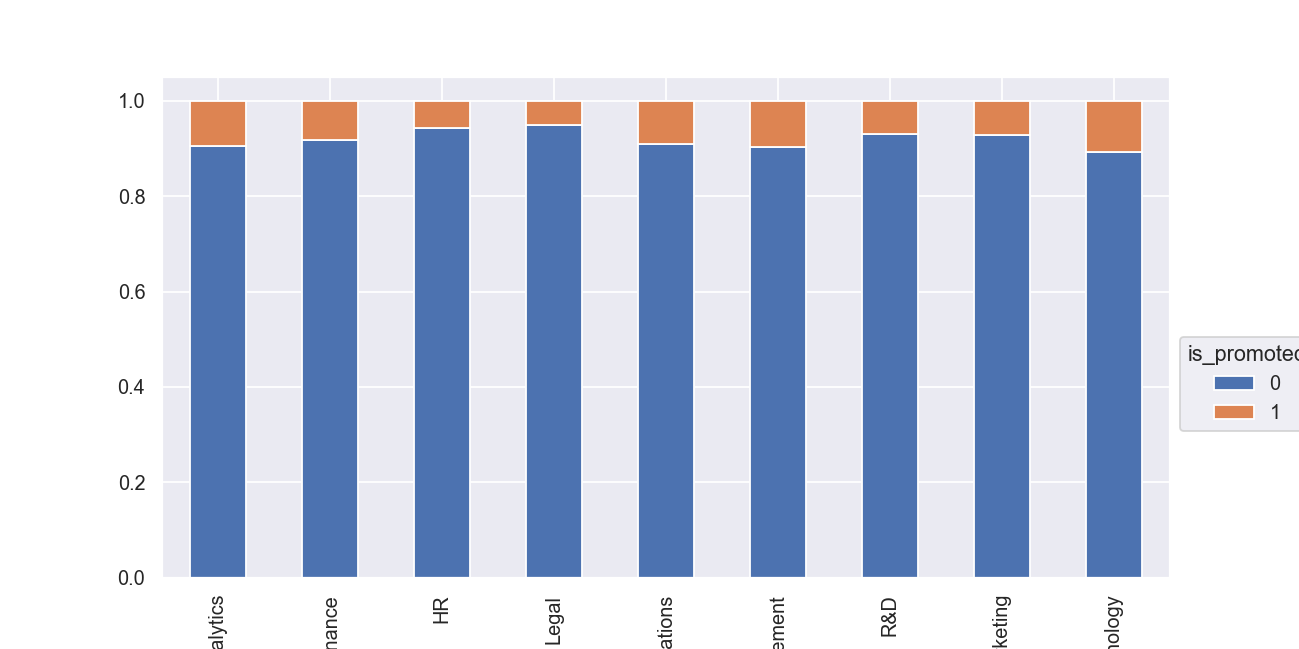

In [178]:
#percentage of people who got promoted from each dept
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train.department,train.is_promoted,normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))
##Clearly the Technology department had the highest number of promotions while
##Legal dept had the least

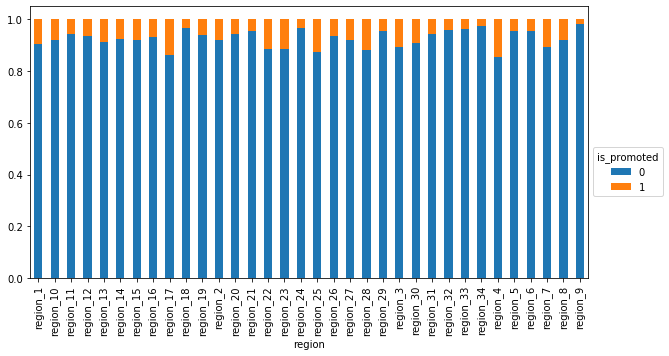

In [18]:
#percentage of promotions across regions
reg = pd.crosstab(train.region,train.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

<IPython.core.display.Javascript object>


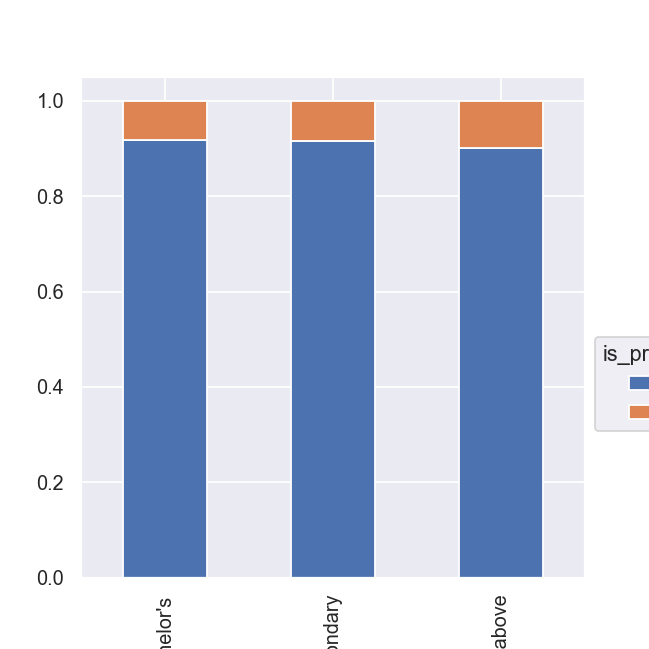

In [179]:
#promotion distribution among people with diffn education backgrounds
plt.rcParams['figure.figsize'] = [5, 5]
edu = pd.crosstab(train.education,train.is_promoted,normalize='index')
edu.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

In [21]:
pd.crosstab(train.recruitment_channel,train.is_promoted,normalize='index')
##clearly percentage of promotions is higher among the employees who recruited through referrals

is_promoted,0,1
recruitment_channel,,
other,0.916048,0.083952
referred,0.879159,0.120841
sourcing,0.914987,0.085013


In [180]:
pd.crosstab(train['KPIs_met >80%'],train.is_promoted,normalize='index')
##people who satisfied KPI condition were promoted in far higher numbers

is_promoted,0,1
KPIs_met >80%,,
0,0.960413,0.039587
1,0.830906,0.169094


<IPython.core.display.Javascript object>


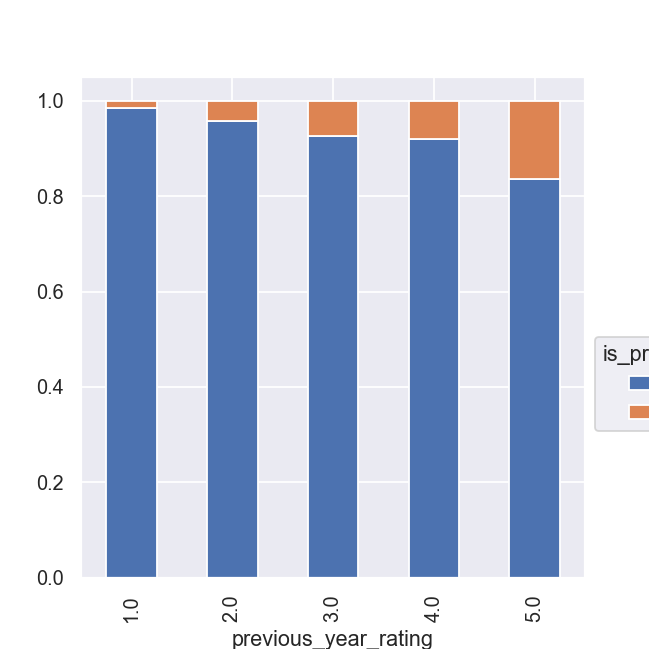

In [181]:
rating = pd.crosstab(train.previous_year_rating,train.is_promoted,normalize='index')
rating.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
##Obviously, people who got higher prev yr ratings were easily promoted

In [182]:
#distribution of avg training score
groups = [30,40,50,60,70,80,90,100]
labels = ['30-40','40-50','50-60','60-70','70-80','80-90','90-100']
train['score_groups'] = pd.cut(train['avg_training_score'], bins=groups, labels=labels)
train['score_groups'].value_counts()
##most of the employees have score in the range of 50-60.
##Extreme ends have low number of people

50-60     16020
40-50     11996
60-70      9973
80-90      8739
70-80      7494
90-100      579
30-40         7
Name: score_groups, dtype: int64

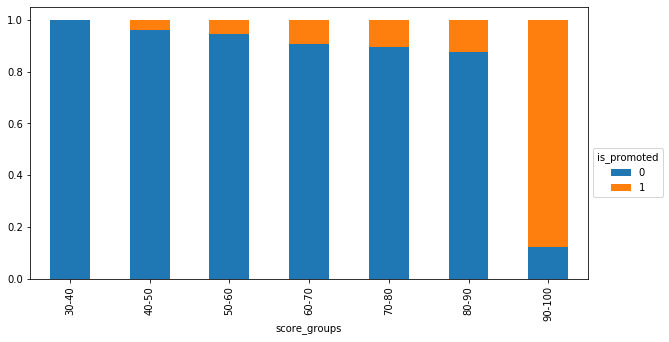

In [27]:
plt.rcParams['figure.figsize'] = [10, 5]
score_groups = pd.crosstab(train.score_groups,train.is_promoted,normalize='index')
score_groups.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
##promotions ratio increases with the score
##Extremely high ratio of promotions is there in 90-100
##Clearly getting promoted is highly dependent on the avg score

<IPython.core.display.Javascript object>


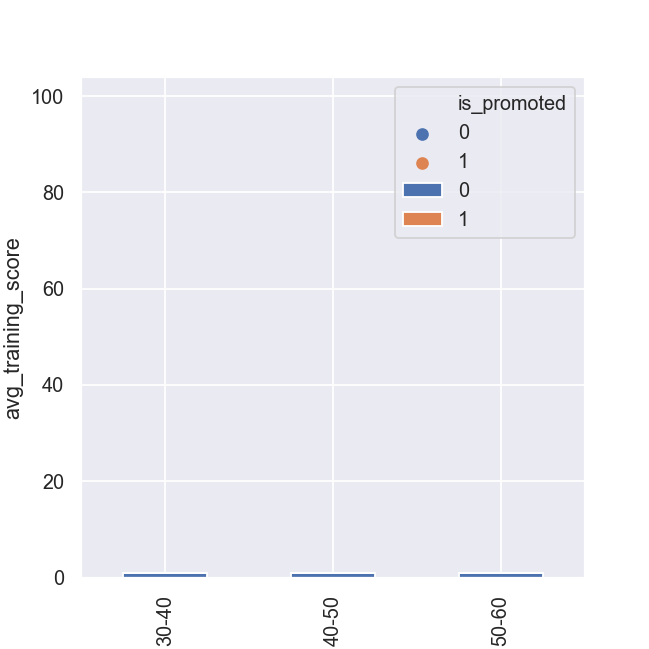

In [183]:
plt.rcParams['figure.figsize'] = [5, 5]
age_groups = [20,30,40,50,60]
age_labels = ['20-30','30-40','40-50','50-60']
train['age_groups'] = pd.cut(train['age'], bins=groups, labels=labels)
train['age_groups'].value_counts()
age_groups = pd.crosstab(train.age_groups,train.is_promoted,normalize='index')
age_groups.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

##clerly age is not affecting promotions much

In [184]:
plt.rcParams['figure.figsize'] = [14, 5]
sns.scatterplot(x='age',y='avg_training_score',hue='is_promoted',data=train)

##This avg training score vs age scatterplot clearly shows that avg training score is a more important parameter

In [30]:
k=int(train['previous_year_rating'].mean())
train['previous_year_rating'].fillna(value=k,inplace=True)
m=int(test['previous_year_rating'].mean())
test['previous_year_rating'].fillna(value=m,inplace=True)

In [185]:
train["education"].fillna(value="Not Available",inplace=True)
test["education"].fillna(value="Not Available",inplace=True)


In [186]:
train.describe(include="all")

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,score_groups,age_groups
count,54808.000000,54808,54808,54808,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808,36690
unique,NaN,9,34,4,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,3
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50-60,30-40
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16020,26028
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170,NaN,NaN
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,NaN,NaN
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,NaN,NaN
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,NaN,NaN
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,NaN,NaN


In [187]:
test.describe(include="all")

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490,23490,23490,23490,23490,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
unique,NaN,9,34,4,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7315,5299,15578,16596,13078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39041.399149,NaN,NaN,NaN,NaN,NaN,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,NaN,NaN,NaN,NaN,NaN,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000


In [188]:
train.set_index("employee_id",inplace=True)
test.set_index("employee_id",inplace=True)


In [189]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,score_groups,age_groups
employee_id,,,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,40-50,30-40
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,50-60,NaN
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,40-50,30-40
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,40-50,30-40
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,70-80,40-50


In [190]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [191]:
train.groupby('department')["no_of_trainings"].describe()


,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,5352.0,1.337818,0.587229,1.0,1.0,1.0,2.0,4.0
Finance,2536.0,1.304022,0.605888,1.0,1.0,1.0,1.0,5.0
HR,2418.0,1.053763,0.232817,1.0,1.0,1.0,1.0,3.0
Legal,1039.0,1.089509,0.383518,1.0,1.0,1.0,1.0,3.0
Operations,11348.0,1.160821,0.427888,1.0,1.0,1.0,1.0,5.0
Procurement,7138.0,1.322779,0.793726,1.0,1.0,1.0,1.0,10.0
R&D,999.0,1.402402,0.700869,1.0,1.0,1.0,2.0,5.0
Sales & Marketing,16840.0,1.277435,0.660753,1.0,1.0,1.0,1.0,10.0
Technology,7138.0,1.260857,0.596130,1.0,1.0,1.0,1.0,7.0


In [192]:
test.groupby('department')["no_of_trainings"].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,2319.0,1.348426,0.589845,1.0,1.0,1.0,2.0,5.0
Finance,1091.0,1.313474,0.628667,1.0,1.0,1.0,1.0,5.0
HR,1085.0,1.065438,0.272263,1.0,1.0,1.0,1.0,3.0
Legal,445.0,1.076404,0.353242,1.0,1.0,1.0,1.0,3.0
Operations,4764.0,1.174643,0.442991,1.0,1.0,1.0,1.0,5.0
Procurement,3020.0,1.340397,0.808630,1.0,1.0,1.0,1.0,9.0
R&D,440.0,1.352273,0.682348,1.0,1.0,1.0,2.0,5.0
Sales & Marketing,7315.0,1.268216,0.629656,1.0,1.0,1.0,1.0,7.0
Technology,3011.0,1.245766,0.564784,1.0,1.0,1.0,1.0,6.0


In [193]:
train.groupby('department')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,5352.0,32.431241,5.994745,20.0,28.0,31.0,35.0,60.0
Finance,2536.0,32.058754,6.521766,20.0,28.0,31.0,35.0,60.0
HR,2418.0,34.385856,8.608311,20.0,28.0,32.0,38.0,60.0
Legal,1039.0,33.832531,7.398306,23.0,29.0,32.0,37.0,60.0
Operations,11348.0,36.073669,7.496754,20.0,31.0,35.0,40.0,60.0
Procurement,7138.0,35.899972,7.998411,20.0,30.0,34.0,40.0,60.0
R&D,999.0,32.842843,4.544627,24.0,30.0,32.0,36.0,50.0
Sales & Marketing,16840.0,34.860629,7.769406,20.0,29.0,33.0,39.0,60.0
Technology,7138.0,34.867190,8.090095,20.0,29.0,33.0,39.0,60.0


In [194]:
test.groupby('department')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,2319.0,32.354463,5.928559,20.0,28.0,31.0,35.0,59.0
Finance,1091.0,32.471127,6.977542,22.0,28.0,31.0,35.0,60.0
HR,1085.0,34.290323,8.608090,20.0,28.0,32.0,38.0,60.0
Legal,445.0,33.786517,7.385266,24.0,29.0,32.0,37.0,60.0
Operations,4764.0,36.110202,7.551699,20.0,31.0,35.0,40.0,60.0
Procurement,3020.0,36.130795,8.175277,20.0,30.0,34.0,40.0,60.0
R&D,440.0,32.820455,4.427296,24.0,30.0,32.0,35.0,49.0
Sales & Marketing,7315.0,34.665755,7.612539,20.0,29.0,33.0,39.0,60.0
Technology,3011.0,34.935237,8.239770,20.0,29.0,33.0,39.0,60.0


In [195]:
train.groupby('department')['length_of_service'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,5352.0,4.932735,3.354521,1.0,3.0,4.0,7.0,34.0
Finance,2536.0,4.819401,3.613654,1.0,2.0,4.0,6.0,33.0
HR,2418.0,5.683623,4.408166,1.0,3.0,5.0,7.0,33.0
Legal,1039.0,4.599615,3.850961,1.0,2.0,4.0,6.0,32.0
Operations,11348.0,6.416020,4.359909,1.0,3.0,5.0,8.0,34.0
Procurement,7138.0,6.331045,4.532367,1.0,3.0,5.0,8.0,32.0
R&D,999.0,4.554555,2.749162,1.0,3.0,4.0,6.0,20.0
Sales & Marketing,16840.0,5.912292,4.292995,1.0,3.0,5.0,8.0,37.0
Technology,7138.0,5.914822,4.510480,1.0,3.0,5.0,7.0,34.0


In [196]:
test.groupby('department')['length_of_service'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,2319.0,4.956878,3.373480,1.0,3.0,4.0,7.0,28.0
Finance,1091.0,5.005500,3.541622,1.0,2.0,4.0,7.0,31.0
HR,1085.0,5.626728,4.303717,1.0,3.0,5.0,7.0,30.0
Legal,445.0,4.602247,3.477274,1.0,2.0,4.0,6.0,21.0
Operations,4764.0,6.414777,4.447572,1.0,3.0,5.0,8.0,34.0
Procurement,3020.0,6.238742,4.418669,1.0,3.0,5.0,8.0,31.0
R&D,440.0,4.750000,2.984585,1.0,2.0,4.0,6.0,18.0
Sales & Marketing,7315.0,5.778947,4.200042,1.0,3.0,5.0,7.0,32.0
Technology,3011.0,5.849552,4.406083,1.0,3.0,5.0,7.0,34.0


In [197]:
train.groupby('department')['previous_year_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,4886.0,3.557307,1.199749,1.0,3.0,3.0,5.0,5.0
Finance,2253.0,3.506436,1.145529,1.0,3.0,3.0,4.0,5.0
HR,2172.0,3.482965,1.185349,1.0,3.0,3.0,5.0,5.0
Legal,871.0,3.405281,1.223306,1.0,3.0,3.0,4.0,5.0
Operations,10760.0,3.632156,1.158748,1.0,3.0,4.0,5.0,5.0
Procurement,6709.0,3.298852,1.182876,1.0,3.0,3.0,4.0,5.0
R&D,912.0,3.563596,1.191035,1.0,3.0,3.0,5.0,5.0
Sales & Marketing,15529.0,3.067937,1.371335,1.0,2.0,3.0,4.0,5.0
Technology,6592.0,3.158677,1.176440,1.0,3.0,3.0,4.0,5.0


In [198]:
test.groupby('department')['previous_year_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,2084.0,3.536468,1.187676,1.0,3.0,3.0,5.0,5.0
Finance,988.0,3.536437,1.183168,1.0,3.0,3.0,5.0,5.0
HR,983.0,3.526958,1.210542,1.0,3.0,3.0,5.0,5.0
Legal,385.0,3.454545,1.292461,1.0,3.0,3.0,5.0,5.0
Operations,4521.0,3.657155,1.137124,1.0,3.0,4.0,5.0,5.0
Procurement,2841.0,3.263640,1.190859,1.0,3.0,3.0,4.0,5.0
R&D,399.0,3.661654,1.140091,1.0,3.0,4.0,5.0,5.0
Sales & Marketing,6711.0,3.090449,1.384182,1.0,2.0,3.0,4.0,5.0
Technology,2766.0,3.151844,1.166473,1.0,3.0,3.0,4.0,5.0


In [199]:
train.groupby('department')['avg_training_score'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,5352.0,84.602952,2.855495,75.0,83.0,85.0,86.0,99.0
Finance,2536.0,60.222003,4.929564,50.0,58.0,60.0,62.0,98.0
HR,2418.0,50.018197,4.680137,40.0,48.0,50.0,51.0,97.0
Legal,1039.0,59.868142,4.103776,52.0,58.0,60.0,61.0,97.0
Operations,11348.0,60.226648,4.818071,50.0,58.0,60.0,62.0,99.0
Procurement,7138.0,70.122443,4.305110,60.0,68.0,70.0,72.0,99.0
R&D,999.0,84.596597,2.921215,73.0,83.0,85.0,86.0,98.0
Sales & Marketing,16840.0,50.261698,5.551414,39.0,48.0,50.0,52.0,99.0
Technology,7138.0,79.928692,3.355511,68.0,78.0,80.0,82.0,99.0


In [200]:
test.groupby('department')['avg_training_score'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,2319.0,84.541182,2.888182,72.0,83.0,84.0,86.0,99.0
Finance,1091.0,60.322640,4.982394,50.0,58.0,60.0,62.0,97.0
HR,1085.0,50.305991,5.482647,41.0,48.0,50.0,52.0,98.0
Legal,445.0,59.575281,3.512759,51.0,57.0,59.0,62.0,91.0
Operations,4764.0,60.300798,5.038003,49.0,58.0,60.0,62.0,99.0
Procurement,3020.0,70.146026,4.229214,61.0,68.0,70.0,72.0,99.0
R&D,440.0,84.413636,2.956294,76.0,82.0,84.0,86.0,96.0
Sales & Marketing,7315.0,50.085988,5.211089,39.0,48.0,50.0,51.0,99.0
Technology,3011.0,79.860511,3.380097,69.0,78.0,80.0,82.0,99.0


In [201]:
train.groupby('department')['KPIs_met >80%'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,5352.0,0.404148,0.490772,0.0,0.0,0.0,1.0,1.0
Finance,2536.0,0.414826,0.492789,0.0,0.0,0.0,1.0,1.0
HR,2418.0,0.334160,0.471794,0.0,0.0,0.0,1.0,1.0
Legal,1039.0,0.333975,0.471858,0.0,0.0,0.0,1.0,1.0
Operations,11348.0,0.430737,0.495201,0.0,0.0,0.0,1.0,1.0
Procurement,7138.0,0.377557,0.484810,0.0,0.0,0.0,1.0,1.0
R&D,999.0,0.416416,0.493211,0.0,0.0,0.0,1.0,1.0
Sales & Marketing,16840.0,0.265083,0.441391,0.0,0.0,0.0,1.0,1.0
Technology,7138.0,0.344354,0.475190,0.0,0.0,0.0,1.0,1.0


In [202]:
test.groupby('department')['KPIs_met >80%'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
Analytics,2319.0,0.404053,0.490814,0.0,0.0,0.0,1.0,1.0
Finance,1091.0,0.396884,0.489476,0.0,0.0,0.0,1.0,1.0
HR,1085.0,0.349309,0.476972,0.0,0.0,0.0,1.0,1.0
Legal,445.0,0.341573,0.474771,0.0,0.0,0.0,1.0,1.0
Operations,4764.0,0.444165,0.496925,0.0,0.0,0.0,1.0,1.0
Procurement,3020.0,0.377483,0.484838,0.0,0.0,0.0,1.0,1.0
R&D,440.0,0.440909,0.497061,0.0,0.0,0.0,1.0,1.0
Sales & Marketing,7315.0,0.276418,0.447257,0.0,0.0,0.0,1.0,1.0
Technology,3011.0,0.350714,0.477273,0.0,0.0,0.0,1.0,1.0


In [203]:
train.groupby('education')["no_of_trainings"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,36669.0,1.270883,0.633341,1.0,1.0,1.0,1.0,10.0
Below Secondary,805.0,1.275776,0.621723,1.0,1.0,1.0,1.0,4.0
Master's & above,14925.0,1.219095,0.559485,1.0,1.0,1.0,1.0,10.0
Not Available,2409.0,1.183479,0.504507,1.0,1.0,1.0,1.0,6.0


In [204]:
test.groupby('education')["no_of_trainings"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,15578.0,1.271087,0.619917,1.0,1.0,1.0,1.0,9.0
Below Secondary,374.0,1.294118,0.763874,1.0,1.0,1.0,1.0,8.0
Master's & above,6504.0,1.222478,0.555552,1.0,1.0,1.0,1.0,8.0
Not Available,1034.0,1.185687,0.496208,1.0,1.0,1.0,1.0,6.0


In [205]:
train.groupby('education')["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,36669.0,33.445226,7.047381,20.0,29.0,32.0,36.0,60.0
Below Secondary,805.0,23.836025,1.829266,20.0,23.0,24.0,25.0,31.0
Master's & above,14925.0,39.352630,7.070637,20.0,34.0,38.0,43.0,60.0
Not Available,2409.0,30.968867,7.550183,20.0,26.0,29.0,34.0,60.0


In [206]:
test.groupby('education')["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,15578.0,33.406086,7.052300,20.0,29.0,32.0,36.0,60.0
Below Secondary,374.0,23.951872,1.761316,20.0,23.0,24.0,25.0,30.0
Master's & above,6504.0,39.340867,7.134473,20.0,34.0,38.0,43.0,60.0
Not Available,1034.0,30.773694,7.177938,20.0,26.0,29.0,34.0,60.0


In [207]:
train.groupby('education')["length_of_service"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,36669.0,5.344542,3.892569,1.0,3.0,4.0,7.0,37.0
Below Secondary,805.0,1.704348,0.816218,1.0,1.0,2.0,2.0,5.0
Master's & above,14925.0,7.605293,4.725710,1.0,4.0,7.0,10.0,34.0
Not Available,2409.0,4.407223,3.723495,1.0,2.0,3.0,6.0,32.0


In [208]:
test.groupby('education')['length_of_service'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,15578.0,5.324689,3.899684,1.0,3.0,4.0,7.0,34.0
Below Secondary,374.0,1.754011,0.886855,1.0,1.0,2.0,2.0,5.0
Master's & above,6504.0,7.440959,4.573041,1.0,4.0,7.0,9.0,31.0
Not Available,1034.0,4.338491,3.597828,1.0,2.0,3.0,6.0,25.0


In [209]:
train.groupby('education')["previous_year_rating"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,33404.0,3.324302,1.266106,1.0,3.0,3.0,4.0,5.0
Below Secondary,458.0,3.493450,1.105467,1.0,3.0,3.0,4.0,5.0
Master's & above,14798.0,3.362549,1.243104,1.0,3.0,3.0,4.0,5.0
Not Available,2024.0,3.130435,1.293270,1.0,2.0,3.0,4.0,5.0


In [210]:
test.groupby('education')["previous_year_rating"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,14167.0,3.335074,1.270224,1.0,3.0,3.0,4.0,5.0
Below Secondary,221.0,3.561086,1.092173,1.0,3.0,3.0,5.0,5.0
Master's & above,6431.0,3.370704,1.249214,1.0,3.0,3.0,4.0,5.0
Not Available,859.0,3.112922,1.268245,1.0,3.0,3.0,4.0,5.0


In [211]:
train.groupby('education')["avg_training_score"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,36669.0,63.422046,13.365371,39.0,51.0,60.0,76.0,99.0
Below Secondary,805.0,64.925466,11.249960,43.0,57.0,62.0,75.0,97.0
Master's & above,14925.0,64.061240,13.219803,40.0,52.0,61.0,76.0,99.0
Not Available,2409.0,58.156496,13.892265,40.0,49.0,52.0,62.0,98.0


In [212]:
test.groupby('education')["avg_training_score"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,15578.0,63.172936,13.440785,40.0,51.0,60.0,76.00,99.0
Below Secondary,374.0,65.422460,11.048182,43.0,58.0,62.0,74.75,93.0
Master's & above,6504.0,64.114391,13.199512,39.0,52.0,62.0,76.00,99.0
Not Available,1034.0,58.486460,13.994962,41.0,49.0,51.0,64.75,96.0


In [213]:
train.groupby('education')["KPIs_met >80%"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,36669.0,0.354496,0.478367,0.0,0.0,0.0,1.0,1.0
Below Secondary,805.0,0.400000,0.490203,0.0,0.0,0.0,1.0,1.0
Master's & above,14925.0,0.360134,0.480055,0.0,0.0,0.0,1.0,1.0
Not Available,2409.0,0.246990,0.431351,0.0,0.0,0.0,0.0,1.0


In [214]:
test.groupby('education')["KPIs_met >80%"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor's,15578.0,0.360316,0.480107,0.0,0.0,0.0,1.0,1.0
Below Secondary,374.0,0.438503,0.496868,0.0,0.0,0.0,1.0,1.0
Master's & above,6504.0,0.364852,0.481426,0.0,0.0,0.0,1.0,1.0
Not Available,1034.0,0.269826,0.444084,0.0,0.0,0.0,1.0,1.0


In [215]:
train.groupby('age')['is_promoted'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
20,113.0,0.035398,0.185607,0.0,0.0,0.0,0.0,1.0
21,98.0,0.051020,0.221171,0.0,0.0,0.0,0.0,1.0
22,231.0,0.077922,0.268631,0.0,0.0,0.0,0.0,1.0
23,428.0,0.079439,0.270740,0.0,0.0,0.0,0.0,1.0
24,845.0,0.082840,0.275804,0.0,0.0,0.0,0.0,1.0
25,1299.0,0.053118,0.224355,0.0,0.0,0.0,0.0,1.0
26,2060.0,0.079126,0.270001,0.0,0.0,0.0,0.0,1.0
27,2827.0,0.092324,0.289534,0.0,0.0,0.0,0.0,1.0
28,3147.0,0.097871,0.297187,0.0,0.0,0.0,0.0,1.0


In [216]:
train['department'].describe()


count                 54808
unique                    9
top       Sales & Marketing
freq                  16840
Name: department, dtype: object

In [217]:
train['department'].describe()

count                 54808
unique                    9
top       Sales & Marketing
freq                  16840
Name: department, dtype: object

In [218]:
train["education"].describe()

count          54808
unique             4
top       Bachelor's
freq           36669
Name: education, dtype: object

In [219]:
test["education"].describe()

count          23490
unique             4
top       Bachelor's
freq           15578
Name: education, dtype: object

In [220]:
train['age'].describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [221]:
test['age'].describe()

count    23490.000000
mean        34.782929
std          7.679492
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [222]:
train['no_of_trainings'].describe()

count    54808.000000
mean         1.253011
std          0.609264
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: no_of_trainings, dtype: float64

In [223]:
test['no_of_trainings'].describe()

count    23490.000000
mean         1.254236
std          0.600910
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: no_of_trainings, dtype: float64

In [224]:
train['length_of_service'].describe()

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

In [225]:
test['length_of_service'].describe()

count    23490.000000
mean         5.810387
std          4.207917
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         34.000000
Name: length_of_service, dtype: float64

In [226]:
train['previous_year_rating'].describe()

count    50684.000000
mean         3.329256
std          1.259993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [227]:
test['previous_year_rating'].describe()

count    21678.000000
mean         3.339146
std          1.263294
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [228]:
train['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [229]:
test['avg_training_score'].describe()

count    23490.000000
mean        63.263133
std         13.411750
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [230]:
train['KPIs_met >80%'].describe()

count    54808.000000
mean         0.351974
std          0.477590
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: KPIs_met >80%, dtype: float64

In [231]:
test['KPIs_met >80%'].describe()

count    23490.000000
mean         0.358834
std          0.479668
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: KPIs_met >80%, dtype: float64

In [232]:
def findBand(age):
    if age <=29:
        return 1
    elif age>29 and age<=33:
        return 2
    elif age>33 and age<=39:
        return 3
    else:
        return 4
train['band'] = train['age'].apply(findBand)
test['band'] = test['age'].apply(findBand)

In [233]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,score_groups,age_groups,band
employee_id,,,,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,40-50,30-40,3
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,50-60,NaN,2
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,40-50,30-40,3
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,40-50,30-40,3
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,70-80,40-50,4


In [234]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,band
employee_id,,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,1
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,2
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,2
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,2
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,2


<IPython.core.display.Javascript object>


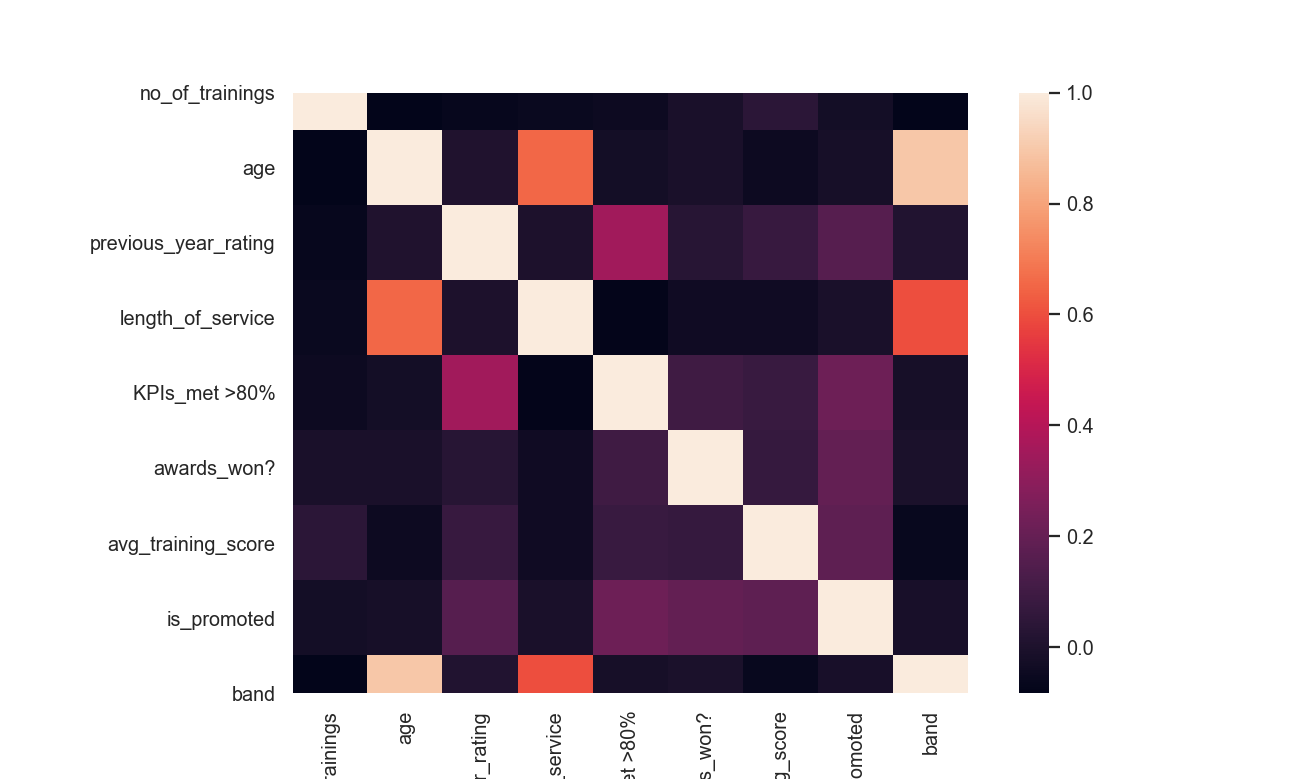

In [235]:
corr = train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, vmax=1, square=True)


In [33]:
train.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


In [236]:
##we can clearly see that is_promoted is most affected by prev year rating, KPIs_met, awards won, and avg_training_score since they have a significant positive relation
##while factors like no_of_trainings, age, length_of_service is having very little effect.

In [237]:
'''
# scatterplot of different columns with is_promoted
import seaborn as sns
sns.set(rc={"figure.figsize":(12,12)})
plt.subplot(3,3,1)
sns.scatterplot(train["is_promoted"],train["no_of_trainings"])
plt.subplot(3,3,2)
sns.scatterplot(train["is_promoted"],train["age"],color='g')
plt.subplot(3,3,3)
sns.scatterplot(train["is_promoted"],train["previous_year_rating"],color='red')
plt.subplot(3,3,4)
sns.scatterplot(train["is_promoted"],train["length_of_service"],color="blue")
plt.subplot(3,3,5)
sns.scatterplot(train["is_promoted"],train["KPIs_met >80%"],color='violet')
plt.subplot(3,3,6)
sns.scatterplot(train["is_promoted"],train["awards_won?"],color='c')
plt.subplot(3,3,7)
sns.scatterplot(train["is_promoted"],train["avg_training_score"],color='orange')
'''

'\n# scatterplot of different columns with is_promoted\nimport seaborn as sns\nsns.set(rc={"figure.figsize":(12,12)})\nplt.subplot(3,3,1)\nsns.scatterplot(train["is_promoted"],train["no_of_trainings"])\nplt.subplot(3,3,2)\nsns.scatterplot(train["is_promoted"],train["age"],color=\'g\')\nplt.subplot(3,3,3)\nsns.scatterplot(train["is_promoted"],train["previous_year_rating"],color=\'red\')\nplt.subplot(3,3,4)\nsns.scatterplot(train["is_promoted"],train["length_of_service"],color="blue")\nplt.subplot(3,3,5)\nsns.scatterplot(train["is_promoted"],train["KPIs_met >80%"],color=\'violet\')\nplt.subplot(3,3,6)\nsns.scatterplot(train["is_promoted"],train["awards_won?"],color=\'c\')\nplt.subplot(3,3,7)\nsns.scatterplot(train["is_promoted"],train["avg_training_score"],color=\'orange\')\n'

In [242]:
import sys
!{sys.executable} -m pip install xgboost  ##This will directly install xgboost directly within the Jupyter notebook
#from xgboost import XGBClassifier
%matplotlib notebook
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn import preprocessing,linear_model, naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

'C:\Users\Ayush' is not recognized as an internal or external command,
operable program or batch file.


In [43]:
##First we will do validation over various ML models and then determine the best out of them
##And then we will finally apply it on the test data

In [44]:
X=train[['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%',"awards_won?","avg_training_score"]]
Y=train['is_promoted']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.20,random_state=0)

In [ ]:
##DO ANALYSIS OF EACH MODEL LATER

In [46]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Ayush Agrawal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_predict=model.predict(X_test)
print(y_predict)
print(y_test)

[0 0 0 ... 0 0 0]
28686    0
16191    0
12951    0
7890     1
29387    0
        ..
10771    0
35658    0
35453    1
6155     0
29736    0
Name: is_promoted, Length: 10962, dtype: int64


In [48]:
model.score(X_train, y_train)

0.9158190028736943

In [49]:
model.score(X_test,y_test)

0.918354314906039

In [50]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict)

0.12852969814995133

In [54]:
accuracy = metrics.accuracy_score(y_test, y_predict)
accuracy
##What fraction of the positive predictions are correct?

0.918354314906039

In [55]:
recall = metrics.recall_score(y_test,y_predict)
recall
##hat fraction of all positive instances does the classifier correctly identify as positive?

##Clearly poor recall is there

0.07166123778501629

In [52]:
#sns.residplot(x=y_predict, y=y_test)

In [56]:
##RANDOM FORESTS

In [129]:
clas = RandomForestClassifier(n_estimators=30,random_state=10)
##tried taking n_estimators=10,20,30,40,50: 30 gave the best result

In [130]:
clas.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [131]:
clas.score(X_train,y_train)

0.9757560552844045

In [132]:
clas.score(X_test,y_test)

0.9120598430943259

In [133]:
y_predict=clas.predict(X_test)
print(y_predict)
print(y_test)

[0 0 0 ... 1 0 0]
28686    0
16191    0
12951    0
7890     1
29387    0
        ..
10771    0
35658    0
35453    1
6155     0
29736    0
Name: is_promoted, Length: 10962, dtype: int64


In [134]:
f1_score(y_test,y_predict)

0.30043541364296084

In [135]:
accuracy = metrics.accuracy_score(y_test, y_predict)
accuracy

0.9120598430943259

In [136]:
recall = metrics.recall_score(y_test,y_predict)
recall

0.2247557003257329

In [66]:
##SVM

In [67]:
from sklearn.svm import SVC
cla= SVC().fit(X_train,y_train)
print(cla)

C:\Users\Ayush Agrawal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [68]:
y_predict=cla.predict(X_test)
print(y_predict)
print(y_test)

[0 0 0 ... 0 0 0]
28686    0
16191    0
12951    0
7890     1
29387    0
        ..
10771    0
35658    0
35453    1
6155     0
29736    0
Name: is_promoted, Length: 10962, dtype: int64


In [69]:
f1_score(y_test,y_predict)

0.19980970504281637

In [70]:
accuracy = metrics.accuracy_score(y_test, y_predict)
accuracy

0.9232804232804233

In [71]:
recall = metrics.recall_score(y_test,y_predict)
recall

0.11400651465798045

In [ ]:
##These low scores in SVM are because in SVM efficacy decreases as dataset is too large
##i.e. over 50000 samples. Therefore don't use SVM

In [72]:
##DECISION TREE

In [162]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=30, random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [163]:
y_predict=classifier.predict(X_test)
print(y_predict)
print(y_test)

[0 0 0 ... 1 0 1]
28686    0
16191    0
12951    0
7890     1
29387    0
        ..
10771    0
35658    0
35453    1
6155     0
29736    0
Name: is_promoted, Length: 10962, dtype: int64


In [164]:
f1_score(y_test,y_predict)

0.2760629004076879

In [165]:
accuracy = metrics.accuracy_score(y_test, y_predict)
accuracy

0.8866082831600073

In [166]:
recall = metrics.recall_score(y_test,y_predict)
recall

0.25732899022801303

In [83]:
##KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [90]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
y_predict=knn.predict(X_test)
print(y_predict)
print(y_test)

[0 0 0 ... 1 0 0]
28686    0
16191    0
12951    0
7890     1
29387    0
        ..
10771    0
35658    0
35453    1
6155     0
29736    0
Name: is_promoted, Length: 10962, dtype: int64


In [93]:
knn.score(X_test, y_test)

0.9189928845101258

In [94]:
f1_score(y_test,y_predict)

0.2210526315789474

In [95]:
accuracy = metrics.accuracy_score(y_test, y_predict)
accuracy

0.9189928845101258

In [96]:
recall = metrics.recall_score(y_test,y_predict)
recall

0.13680781758957655

In [3]:
##Random forests clearly come out as the best algo
##Therefore we will employ the Random Forests on our test data